## This script is used to classify the given patient's blood sample image is Unaffected or Parasitized (Affected).
## Why this study
### As we know Malaria is one of the deadly diseases and a big threat to humans.
It is essential for identifying the trace of Malaria in the patients’ blood cell at earlier stages. This will help the doctors to diagnose the patients with the appropriate medications.

### Approach to classify the images:
1.	Prepare the images for image classification model
2.	Build the architecture (layers, filters, activation methods and so on) of the classification model (in this case, we are using CNN (Convolutional Neural Network) model
3.	Prepare train and test data
4.	Train the model using appropriate input conditions
5.	Plot the accuracy and analyses the loss function of the model
6.	Predict and test the model
7.	Implement the model in web-based GUI


Section1: Prepare the images for classification model
- Malaria dataset has two main class of images, namely Parasitized and Uninfected.
- Two classes has 13,779 images (blood sample images) of 150 patients
- Image sizes were varying from 46 pixels to 394 pixels
- Average image size is close to 130 pixels
- So we shall choose 128 x 128 as the size of the image
- 80% of the images needed to be selected randomly for training
    - The same was done using random function.
        - File paths were appended into the list file, seeded randomly and shuffled
    - Shuffled file paths were used to place the respective files in trainFolder
- Similary 10% of the images were stored in testing and validation folder respectively

In [231]:
import numpy as np # for performing linear algebra related operations
import os  # for performing file copying, list the files in directory and so on
import tensorflow as tf  # tensor flow is the deeplearning platfor for creating neural network with deep layer 
from tensorflow import keras # is used for performing AI related tasks
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # for augmenting the image with required scaling
from tensorflow.keras.models import Sequential  # linear stack of layers, a type of layers used in tf
from tensorflow.keras.layers import Conv2D # for performing 2 dimensional convolution
from tensorflow.keras.layers import Activation # for activating non-linear functions
from tensorflow.keras.layers import Flatten # for flattening the layers into tensors
from tensorflow.keras.layers import Dropout # for reducing overfitting
from tensorflow.keras.layers import Dense # for creating fully dense layers
import matplotlib.pyplot as plt  # for plotting 
from tensorflow.keras.layers import InputLayer, Reshape, Conv1D, MaxPool1D, SeparableConv2D #optional
import cv2 # open cv for handling image related operations

In [241]:
import os  # for assigning the training, testing and validation folders

sourceFolder = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/cell_images/"  # source folder were all images were located

baseFolder = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/" # workding directory
ParasitizedFolder = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/cell_images//Parasitized"
UninfectedFolder = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/cell_images//Uninfected"
trainFolder = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/training" 
valFolder = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/validation"
testFolder = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1"
# derive the training, validation, and testing directories
trainParasitized = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/training/Parasitized"
testParasitized = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Parasitized"
valParasitized ="C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/validation/Parasitized"
valUninfected = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/validation/Uninfected"
trainUninfected = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/training/Uninfected"
testUninfected = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Uninfected"

In [243]:
ParasitizedPaths = []  # list contains the paths of the Parasitized images
UninfectedPaths = [] # list contains the paths of the Uninfected images
i = 0
for filename in os.listdir(ParasitizedFolder):
    path1 = os.path.join(ParasitizedFolder, filename)
    ParasitizedPaths.append(path1)
    i += 1
    
i = 0
for filename in os.listdir(UninfectedFolder):
    path2 = os.path.join(UninfectedFolder, filename)
    UninfectedPaths.append(path2)
    i += 1


In [244]:
import PIL  # pillow function for image opening
widthParasitized = []
heightParasitized = []
i = 0
for filename in ParasitizedPaths:
    width1, height1 = PIL.Image.open(filename).size
    widthParasitized.append(width1)
    heightParasitized.append(height1)
    i += 1

In [245]:
widthUnaffected = []
heightUnaffected = []
i = 0
for filename in UninfectedPaths:
    width_unaffected1, height_unaffected1 = PIL.Image.open(filename).size
    widthUnaffected.append(width_unaffected1)
    heightUnaffected.append(height_unaffected1)
    i += 1

In [237]:
# for finding the number of images and classes available in the training folder
img_height,img_width=128,128  
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  sourceFolder,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.


In [251]:
np.array(widthParasitized).min(), np.array(heightParasitized).min(), np.array(widthUnaffected).min(), np.array(heightUnaffected).min()

(46, 40, 49, 49)

In [250]:
np.array(widthParasitized).max(), np.array(heightParasitized).max(), np.array(widthUnaffected).max(), np.array(heightUnaffected).max()

(394, 385, 247, 235)

In [249]:
np.array(widthParasitized).mean(), np.array(heightParasitized).mean(), np.array(widthUnaffected).mean(), np.array(heightUnaffected).mean()

(133.6318310472458, 134.3868930981929, 131.3424776834313, 131.58001306335728)

In [234]:
# for finding the number of images and classes available in the training folder

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  sourceFolder,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


In [235]:
class_names = train_ds.class_names

print(class_names)
len(class_names)

['Parasitized', 'Uninfected']


2

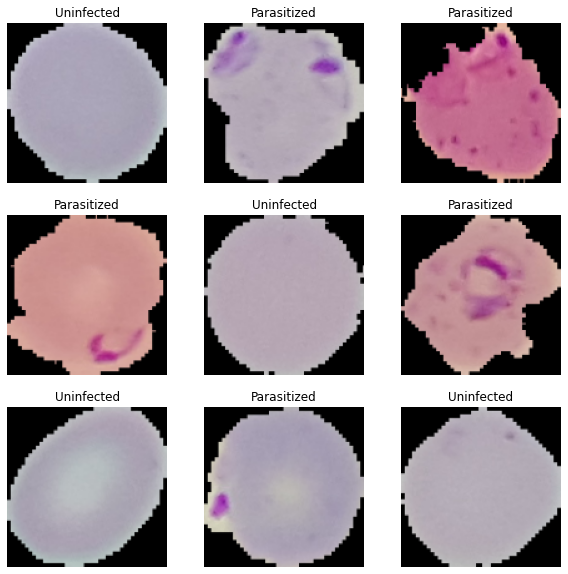

In [248]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [33]:

#num_classes = len(class_names)

ds_model = Sequential()
ds_model.add(Conv2D(16,(3,3),activation='relu',input_shape= (128,128,3)))
ds_model.add(MaxPool2D(2,2))
ds_model.add(Dropout(0.2))
ds_model.add(Conv2D(32,(3,3),activation='relu'))
ds_model.add(MaxPool2D(2,2))
ds_model.add(Dropout(0.2))
ds_model.add(SeparableConv2D(64,(3,3),activation='relu'))
ds_model.add(MaxPool2D(2,2))
ds_model.add(Dropout(0.3))

ds_model.add(SeparableConv2D(128,(3,3),activation='relu'))
ds_model.add(MaxPool2D(2,2))
ds_model.add(Dropout(0.3))

ds_model.add(Flatten())
ds_model.add(Dense(64,activation='relu'))
ds_model.add(Dropout(0.5))
ds_model.add(Dense(2,activation='softmax'))

ds_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


ds_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 dropout_29 (Dropout)        (None, 63, 63, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_30 (Dropout)        (None, 30, 30, 32)       

In [204]:
input_length = 128,128,3

ds_model = Sequential()
ds_model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
ds_model.add(MaxPool2D(2,2))
ds_model.add(Dropout(0.2))

ds_model.add(Conv2D(32,(3,3),activation='relu'))
ds_model.add(MaxPool2D(2,2))
ds_model.add(Dropout(0.2))

ds_model.add(SeparableConv2D(64,(3,3),activation='relu'))
ds_model.add(MaxPool2D(2,2))
ds_model.add(Dropout(0.3))

ds_model.add(SeparableConv2D(128,(3,3),activation='relu'))
ds_model.add(MaxPool2D(2,2))
ds_model.add(Dropout(0.3))

ds_model.add(Flatten())
ds_model.add(Dense(64,activation='relu'))
ds_model.add(Dropout(0.5))

ds_model.add(Dense(1,activation='sigmoid'))

opt = tf.keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)
ds_model.compile(optimizer= opt, loss='binary_crossentropy', metrics=['accuracy'])
ds_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 63, 63, 16)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_35 (Dropout)        (None, 30, 30, 32)       

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [205]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.33)

In [206]:
train_generator = train_datagen.flow_from_directory(directory= trainFolder,             
                                                     target_size=(128, 128),
                                                     class_mode='binary',
                                                     subset='training',
                                                    shuffle=True,
                                                     batch_size=32
                                 )

valid_generator = train_datagen.flow_from_directory(directory= valFolder,
                                                      target_size=(128, 128),
                                                     class_mode='binary',
                                                           shuffle = True,
                                                     subset='validation',
                                                     batch_size=32,
                                                    
                                                     )


classes = ['Parasitized', 'Uninfected']

Found 14772 images belonging to 2 classes.
Found 908 images belonging to 2 classes.


In [207]:
sample_training_images, train_label = next(train_generator)

In [208]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [209]:
history = ds_model.fit(train_generator,
                              epochs=20,
                              steps_per_epoch= len(train_generator),
                              validation_data = (valid_generator),
                              callbacks = [early_stop],
                              verbose=1
                              )

Epoch 1/20
462/462 [==============================] - 74s 159ms/step - loss: 0.6461 - accuracy: 0.6155 - val_loss: 0.4466 - val_accuracy: 0.8502
Epoch 2/20
462/462 [==============================] - 76s 163ms/step - loss: 0.3703 - accuracy: 0.8823 - val_loss: 0.1827 - val_accuracy: 0.9427
Epoch 3/20
462/462 [==============================] - 79s 170ms/step - loss: 0.2345 - accuracy: 0.9282 - val_loss: 0.1448 - val_accuracy: 0.9438
Epoch 4/20
462/462 [==============================] - 76s 165ms/step - loss: 0.2171 - accuracy: 0.9337 - val_loss: 0.1351 - val_accuracy: 0.9570
Epoch 5/20
462/462 [==============================] - 76s 164ms/step - loss: 0.2027 - accuracy: 0.9372 - val_loss: 0.1305 - val_accuracy: 0.9537
Epoch 6/20
462/462 [==============================] - 76s 165ms/step - loss: 0.2008 - accuracy: 0.9427 - val_loss: 0.1220 - val_accuracy: 0.9581
Epoch 7/20
462/462 [==============================] - 77s 167ms/step - loss: 0.1882 - accuracy: 0.9460 - val_loss: 0.1194 - val_ac

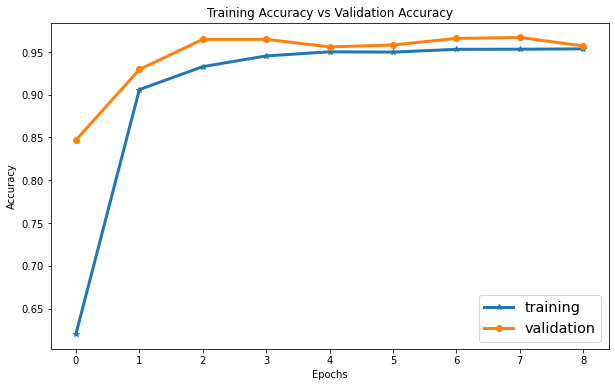

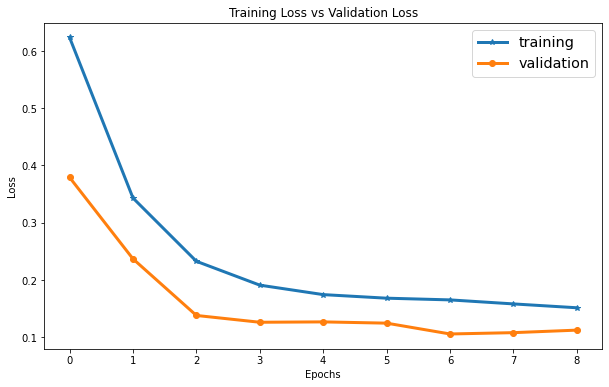

In [36]:
def plotTraining(history, lw = 3):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize = 'x-large')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()
plotTraining(history)

In [40]:
from tensorflow.keras.models import save_model, load_model
ds_model.save('myMalaria_Model.hdf5')

In [211]:

image1 = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Parasitized/C39P4thinF_original_IMG_20150622_105335_cell_6.png"
img = cv2.imread(image1)
img = cv2.resize(img,(128,128))     # resize image to match model's expected sizing
img = img.reshape(1,128,128,3) # return the image with shaping that TF wants.
image = np.array(img)
image = image *(1./255)

In [212]:
image.shape

(1, 128, 128, 3)

In [213]:
pred = ds_model.predict(image)
pred

array([[0.16826674]], dtype=float32)

In [190]:
image[0][0]

array([[  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0],
       [ 74,  66,  83],
       [154, 136, 170],
       [154, 134, 169],
       [151, 131, 166],
       [155, 134, 169],
       [156, 134, 169],
       [154, 131, 167],
       [154, 130, 165],
       [153, 128, 163],
       [152, 128, 163],
       [153, 129, 163],
       [154, 130, 165],
       [150, 129, 162],
       [151, 130, 163],
       [151, 130, 163],
       [151, 130, 163],
       [151, 130, 163],
       [153, 131, 164],
       [152, 131, 164],
       [151, 130, 163],
       [150, 128, 163],
       [152, 130, 165],
       [152, 130, 165],
       [154, 132, 167],
       [154, 132, 167],
       [149, 127, 162],
       [151, 129, 163],
       [153, 131, 166],
       [157, 135, 170],
       [160, 138, 173],
       [160, 138

In [193]:
#np.count_nonzero(~np.isnan(image))

In [198]:
testParasitizedPaths = []
testUninfectedPaths = []
i = 0
for filename in os.listdir(testParasitized):
    path1 = os.path.join(testParasitized, filename)
    testParasitizedPaths.append(path1)
    i += 1
    
i = 0
for filename in os.listdir(testUninfected):
    path2 = os.path.join(testUninfected, filename)
    testUninfectedPaths.append(path2)
    i += 1

In [199]:
testParasitizedPaths

['C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Parasitized\\C100P61ThinF_IMG_20150918_144823_cell_162.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Parasitized\\C100P61ThinF_IMG_20150918_145042_cell_163.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Parasitized\\C100P61ThinF_IMG_20150918_145042_cell_164.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Parasitized\\C100P61ThinF_IMG_20150918_145609_cell_144.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Parasitized\\C100P61ThinF_IMG_20150918_145938_cell_170.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testin

In [200]:
testUninfectedPaths

['C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Uninfected\\C100P61ThinF_IMG_20150918_145042_cell_94.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Uninfected\\C100P61ThinF_IMG_20150918_145422_cell_138.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Uninfected\\C100P61ThinF_IMG_20150918_145422_cell_21.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Uninfected\\C100P61ThinF_IMG_20150918_145609_cell_101.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Uninfected\\C100P61ThinF_IMG_20150918_145609_cell_91.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Uninfected\\C100P61ThinF_IMG_20150918_145938_cell_145.png',
 'C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Uninfec

In [217]:
score = []
for image in testParasitizedPaths:
    image1 = image
    img = cv2.imread(image1)
    img = cv2.resize(img,(128,128))     # resize image to match model's expected sizing
    img = img.reshape(1,128,128,3) # return the image with shaping that TF wants.
    image = np.array(img)
    image = image *(1./255)
    pred = ds_model.predict(image)
    score.append(pred)

In [220]:
score = score*100

In [255]:
max(score)

array([[0.9928534]], dtype=float32)

In [227]:
score_uninfected = []
for image in testUninfectedPaths:
    image1 = image
    img = cv2.imread(image1)
    img = cv2.resize(img,(128,128))     # resize image to match model's expected sizing
    img = img.reshape(1,128,128,3) # return the image with shaping that TF wants.
    image = np.array(img)
    image = image *(1./255)
    pred = ds_model.predict(image)
    score_uninfected.append(pred)

[array([[0.9509301]], dtype=float32),
 array([[0.95222384]], dtype=float32),
 array([[0.8458569]], dtype=float32),
 array([[0.95248115]], dtype=float32),
 array([[0.9226239]], dtype=float32),
 array([[0.95524645]], dtype=float32),
 array([[0.93272465]], dtype=float32),
 array([[0.9451741]], dtype=float32),
 array([[0.8857206]], dtype=float32),
 array([[0.94029176]], dtype=float32),
 array([[0.94574]], dtype=float32),
 array([[0.8787081]], dtype=float32),
 array([[0.90392846]], dtype=float32),
 array([[0.92788184]], dtype=float32),
 array([[0.9327743]], dtype=float32),
 array([[0.94663405]], dtype=float32),
 array([[0.6451801]], dtype=float32),
 array([[0.97448206]], dtype=float32),
 array([[0.93664396]], dtype=float32),
 array([[0.9813827]], dtype=float32),
 array([[0.6770835]], dtype=float32),
 array([[0.6935179]], dtype=float32),
 array([[0.78634566]], dtype=float32),
 array([[0.20234]], dtype=float32),
 array([[0.79040945]], dtype=float32),
 array([[0.8729571]], dtype=float32),
 arr

In [165]:
eval_datagen = ImageDataGenerator(rescale=1./255)
eval_generator = eval_datagen.flow_from_directory(
        testFolder,target_size=(128, 128),
        batch_size=32,
        class_mode='binary')
eval_generator.reset()    
pred = ds_model.predict_generator(eval_generator,1000,verbose=1)
print("Predictions finished")
  
import matplotlib.image as mpimg
for index, probability in enumerate(pred):
    image_path = testFolder + "/" +eval_generator.filenames[index]
    img = mpimg.imread(image_path)
    
    #plt.imshow(img)
    print(eval_generator.filenames[index])
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% B")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% A")
    plt.show()

Found 2754 images belonging to 2 classes.
   1/1000 [..............................] - ETA: 1:24

C:\Users\amazon\AppData\Local\Temp/ipykernel_13436/110986148.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred = ds_model.predict_generator(eval_generator,1000,verbose=1)


1000/1000 [==============================] - 3s 3ms/step
Predictions finished
Parasitized\C100P61ThinF_IMG_20150918_144104_cell_168.png


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [252]:
image1 = "C:/Users/amazon/Documents/Python/Intern_assignment_IQGateway/testing1/Uninfected/C77P38ThinF_IMG_20150602_112011_cell_38.png"
img = cv2.imread(image1)
img = cv2.resize(img,(128,128))     # resize image to match model's expected sizing
img = img.reshape(1,128,128,3) # return the image with shaping that TF wants.
image = np.array(img)
image = image *(1./255)
pred = ds_model.predict(image)
pred
if pred>0.5:
    print("The blood cell is uninfected")
else:
    print("The blood sample is Parasitized")

The blood cell is uninfected
